<a href="https://colab.research.google.com/github/gombergere/arthomas/blob/master/Copy_of_tf_2_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2.0 Intro

## Imports


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
     |████████████████████████████████| 3.8MB 36.1MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled googl

## Loading data and visualisation

In [2]:

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


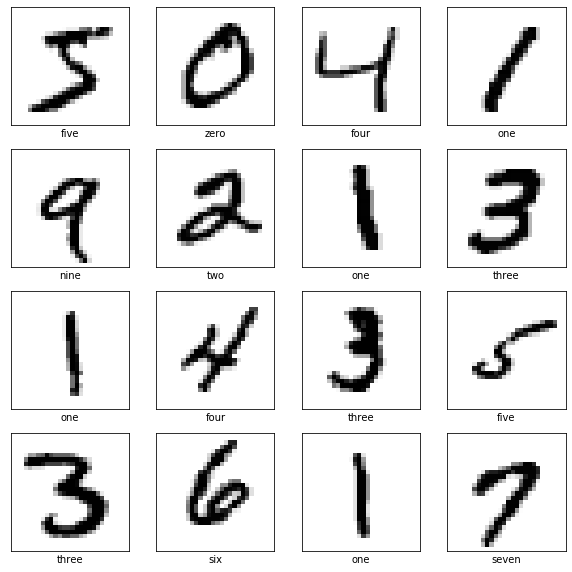

In [3]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Definition

In [4]:
IMG_SIZE = (28, 28, 1)
input_img = layers.Input(shape=IMG_SIZE)

model = layers.Conv2D(32, (3, 3), padding='same')(input_img)
model = layers.Activation('relu')(model)
model = layers.Conv2D(32, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)

model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(32)(model)
model = layers.Activation('relu')(model)
model = layers.Dense(10)(model)
output_img = layers.Activation('softmax')(model)

model = models.Model(input_img, output_img)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
______________________________________________

## Training and Testing

In [0]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [0]:
adam = optimizers.Adam(lr=0.0001)
model.compile(adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [7]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.8341 - acc: 0.7276 - val_loss: 0.3281 - val_acc: 0.9063
Epoch 2/10
60000/60000 [==============================] - 18s 300us/sample - loss: 0.2974 - acc: 0.9145 - val_loss: 0.2308 - val_acc: 0.9290
Epoch 3/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.2038 - acc: 0.9410 - val_loss: 0.1305 - val_acc: 0.9606
Epoch 4/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.1535 - acc: 0.9556 - val_loss: 0.1046 - val_acc: 0.9680
Epoch 5/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.1264 - acc: 0.9626 - val_loss: 0.0932 - val_acc: 0.9696
Epoch 6/10
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1081 - acc: 0.9683 - val_loss: 0.0977 - val_acc: 0.9708
Epoch 7/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0923 - acc: 0.9728 

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

KeyError: ignored

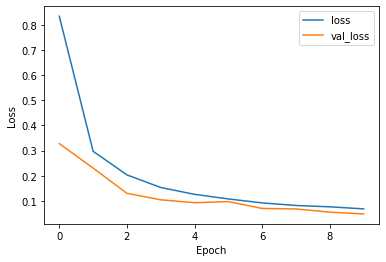

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [10]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy = {0:.2f}%'.format(test_accuracy*100.0))

10000/10000 - 1s - loss: 0.0486 - acc: 0.9851

Test accuracy = 98.51%
